# Automatically calculating number of rays to shoot based on user's desired uncertainty

### Fractional uncertainty: $\delta$

### Number of rays in source plane per pixel of width $dx$:
$n_{source} = \dfrac{\delta^{-2}}{dx^2}$

### This gets transformed into the image plane, where the area of the pixel is scaled up by $A$, the magnification.
### The new number of rays per area in the image plane is:
$n_{image} = \dfrac{\delta^{-2}}{A dx^2}$


### Magnification as a function of seperation from single lens:
$A(u) = \dfrac{u^2 + 2}{u \sqrt{u^2 + 4}}$

In [147]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time as t

import sys
sys.path.append('..')

from IRSMicroLensing import IRSCaustics as IRSC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def A(u):
    return (u**2 + 2) / (u * np.sqrt(u**2 + 4))

In [148]:
lens_att = [
    [0, 0, 0.01, 1],
    [0.8, 0, 0.01, 1e-3],
    # [0.8, 0.1, 0.01, 1e-6],
]

num_theta = 5000
num_r = 4 * num_theta

param_dict = {'pixels': 1000, 'ang_width': 'auto', 'lens_att': lens_att, 'thickness': 'auto', 'num_r': num_r, 'num_theta': num_theta}
mag_map = IRSC.IRSCaustics(annulus_param_dict=param_dict)

final_time = []

for i in range(1, 200):
    init_time = t.time()
    magnifications = mag_map.series_calculate(subdivisions=i)
    final_time.append(t.time() - init_time)

---------------------
Total time: 6.962 seconds
---------------------
Total time: 5.458 seconds
---------------------
Total time: 4.629 seconds
---------------------
Total time: 4.206 seconds
---------------------
Total time: 4.119 seconds
---------------------
Total time: 4.107 seconds
---------------------
Total time: 3.994 seconds
---------------------
Total time: 3.813 seconds
---------------------
Total time: 3.917 seconds
---------------------
Total time: 4.119 seconds
---------------------
Total time: 3.962 seconds
---------------------
Total time: 3.799 seconds
---------------------
Total time: 3.8 seconds
---------------------
Total time: 3.928 seconds
---------------------
Total time: 3.808 seconds
---------------------
Total time: 3.811 seconds
---------------------
Total time: 3.85 seconds
---------------------
Total time: 3.775 seconds
---------------------
Total time: 3.752 seconds
---------------------
Total time: 3.84 seconds
---------------------
Total time: 3.733 seco

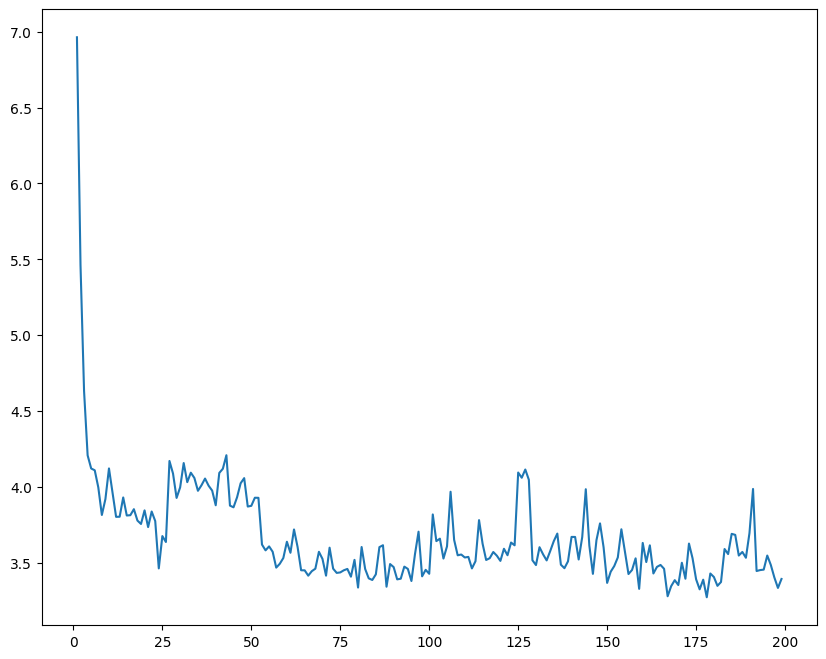

In [164]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

subdivisions = np.arange(1, 200, 1)
final_time = np.array(final_time)

dat = np.vstack((subdivisions, final_time))

np.save('dat.npy', dat)

ax.plot(subdivisions, final_time)

plt.show()

In [ ]:
timing_data = np.load('../Unity/Analysis 6-4//timing_data.npy')

print(timing_data)

FileNotFoundError: [Errno 2] No such file or directory: '../../tests/timing_data.npy'

In [ ]:
pixels = 1000
delta = 0.01

ang_width, thickness, (y_plus, y_minus), points = IRSC.IRSCaustics.ang_width_thickness_calculator(lens_att)

num_r, num_theta = IRSC.IRSCaustics.num_ray_calculator(pixels, ang_width, delta, y_plus, y_minus)

print(num_r, num_theta)
print(f'{(num_r * num_theta):.2e}')

389768 97442
3.80e+10


In [127]:
subdivisions = 10

y_plus = 1
y_minus = -1
thickness = y_plus - y_minus

num_theta = 100
num_r = 4*num_theta
dr = thickness / (num_r - 1)

rs = np.linspace(y_minus, y_plus, num_r)
print(rs)
print(dr)
print(rs[1] - rs[0])
print(rs.shape)

print(y_plus - dr*subdivisions)

# Rs = np.linspace(y_minus, y_plus - dr*subdivisions, int(num_r / subdivisions))
step_r = 9
Rs = np.arange(y_minus + step_r*dr, y_plus + step_r*dr, dr * subdivisions)
print(Rs)
print(Rs.shape)

print()
# for i in range(len(Rs)):
#     print(np.where(Rs[i] == rs))
print((np.round(Rs, 6) == np.round(rs[step_r:num_r+step_r:subdivisions], 6)).all())

    

[-1.         -0.99498747 -0.98997494 -0.98496241 -0.97994987 -0.97493734
 -0.96992481 -0.96491228 -0.95989975 -0.95488722 -0.94987469 -0.94486216
 -0.93984962 -0.93483709 -0.92982456 -0.92481203 -0.9197995  -0.91478697
 -0.90977444 -0.9047619  -0.89974937 -0.89473684 -0.88972431 -0.88471178
 -0.87969925 -0.87468672 -0.86967419 -0.86466165 -0.85964912 -0.85463659
 -0.84962406 -0.84461153 -0.839599   -0.83458647 -0.82957393 -0.8245614
 -0.81954887 -0.81453634 -0.80952381 -0.80451128 -0.79949875 -0.79448622
 -0.78947368 -0.78446115 -0.77944862 -0.77443609 -0.76942356 -0.76441103
 -0.7593985  -0.75438596 -0.74937343 -0.7443609  -0.73934837 -0.73433584
 -0.72932331 -0.72431078 -0.71929825 -0.71428571 -0.70927318 -0.70426065
 -0.69924812 -0.69423559 -0.68922306 -0.68421053 -0.67919799 -0.67418546
 -0.66917293 -0.6641604  -0.65914787 -0.65413534 -0.64912281 -0.64411028
 -0.63909774 -0.63408521 -0.62907268 -0.62406015 -0.61904762 -0.61403509
 -0.60902256 -0.60401003 -0.59899749 -0.59398496 -0.

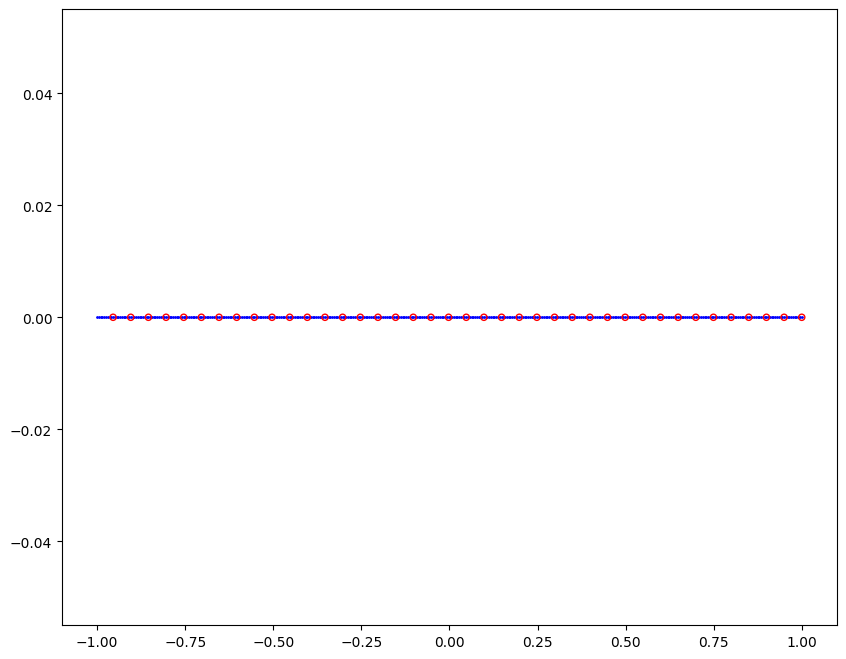

In [128]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.scatter(rs, np.zeros_like(rs), c='blue', s=1)
ax.scatter(Rs, np.zeros_like(Rs), s=20, edgecolor='red', facecolor='None')

plt.show()

In [138]:
rs = np.linspace(y_minus, y_plus, num_r).reshape(-1, 1)
thetas = np.linspace(0, 2*np.pi - (2*np.pi/num_theta), num_theta).reshape(1, -1)

print(thetas)
for i in range(0, len(thetas[0]), 3):
    print(thetas[0, i:i+3].reshape(1, -1))

# print(np.dot(rs, np.cos(theta)).shape)
# print(np.dot(rs, np.cos(thetas)).shape)

[[0.00000000e+00 1.25663706e-03 2.51327412e-03 ... 6.27941540e+00
  6.28067203e+00 6.28192867e+00]]
[[0.         0.00125664 0.00251327]]
[[0.00376991 0.00502655 0.00628319]]
[[0.00753982 0.00879646 0.0100531 ]]
[[0.01130973 0.01256637 0.01382301]]
[[0.01507964 0.01633628 0.01759292]]
[[0.01884956 0.02010619 0.02136283]]
[[0.02261947 0.0238761  0.02513274]]
[[0.02638938 0.02764602 0.02890265]]
[[0.03015929 0.03141593 0.03267256]]
[[0.0339292  0.03518584 0.03644247]]
[[0.03769911 0.03895575 0.04021239]]
[[0.04146902 0.04272566 0.0439823 ]]
[[0.04523893 0.04649557 0.04775221]]
[[0.04900885 0.05026548 0.05152212]]
[[0.05277876 0.05403539 0.05529203]]
[[0.05654867 0.0578053  0.05906194]]
[[0.06031858 0.06157522 0.06283185]]
[[0.06408849 0.06534513 0.06660176]]
[[0.0678584  0.06911504 0.07037168]]
[[0.07162831 0.07288495 0.07414159]]
[[0.07539822 0.07665486 0.0779115 ]]
[[0.07916813 0.08042477 0.08168141]]
[[0.08293805 0.08419468 0.08545132]]
[[0.08670796 0.08796459 0.08922123]]
[[0.09047787